In [1]:
import pandas as pd
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import numpy as np
from plotly.graph_objs import Scatter, Figure, Layout, Histogram, Box
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("pali_vs_susie_vs_dfs.csv", header=None, names=["pali_not_weak", "pali_weak", "pali_not_weak_sub", "pali_weak_sub",
                                                                 "dfs_weak", "dfs_strong", "dfs_weak_sub", "dfs_strong_sub",
                                                                 "susie", "susie_sub", "t_pali_not_weak",
                                                               "t_pali_weak",  "t_pali_sub_not_weak",
                                                               "t_pali_sub_weak", "dfs_weak_sub_time", "dfs_strong_sub_time",
                                                                 "dfs_weak_time", "dfs_strong_time",
                                                                 "t_susie", "t_susie_sub",
                                                          "n_relations", "size_max_function", "n_functions"])

In [3]:
df.head()

,pali_not_weak,pali_weak,pali_not_weak_sub,pali_weak_sub,dfs_weak,dfs_strong,dfs_weak_sub,dfs_strong_sub,susie,susie_sub,...,t_pali_sub_weak,dfs_weak_sub_time,dfs_strong_sub_time,dfs_weak_time,dfs_strong_time,t_susie,t_susie_sub,n_relations,size_max_function,n_functions
0,False,False,False,False,False,False,False,False,True,False,...,0.004133,0.000205,0.002384,0.000828,0.000754,0.000807,0.001546,10,3,5
1,True,True,True,True,True,True,True,True,True,True,...,0.002841,0.000069,0.000082,0.000103,0.000105,0.000847,0.002207,10,3,5
2,True,True,False,False,True,True,False,False,True,False,...,0.002721,0.000252,0.000085,0.000351,0.000047,0.000973,0.001603,10,3,5
3,True,True,False,False,True,True,False,False,True,False,...,0.002506,0.000153,0.000085,0.001250,0.000492,0.000885,0.001556,10,3,5
4,True,True,True,True,True,True,True,True,True,True,...,0.004361,0.000075,0.000095,0.000128,0.000130,0.000963,0.002430,10,3,5


In [4]:
df["pali_not_weak"] = ~df["pali_not_weak"]
df["pali_weak"] = ~df["pali_weak"]
df["pali_not_weak_sub"] = ~df["pali_not_weak_sub"]
df["pali_weak_sub"] = ~df["pali_weak_sub"]
df["dfs_weak"] = ~df["dfs_weak"]
df["dfs_strong"] = ~df["dfs_strong"]
df["dfs_weak_sub"] = ~df["dfs_weak_sub"]
df["dfs_strong_sub"] = ~df["dfs_strong_sub"]
df["susie"] = ~df["susie"]
df["susie_sub"] = ~df["susie_sub"]

In [5]:
df.head()

,pali_not_weak,pali_weak,pali_not_weak_sub,pali_weak_sub,dfs_weak,dfs_strong,dfs_weak_sub,dfs_strong_sub,susie,susie_sub,...,t_pali_sub_weak,dfs_weak_sub_time,dfs_strong_sub_time,dfs_weak_time,dfs_strong_time,t_susie,t_susie_sub,n_relations,size_max_function,n_functions
0,True,True,True,True,True,True,True,True,False,True,...,0.004133,0.000205,0.002384,0.000828,0.000754,0.000807,0.001546,10,3,5
1,False,False,False,False,False,False,False,False,False,False,...,0.002841,0.000069,0.000082,0.000103,0.000105,0.000847,0.002207,10,3,5
2,False,False,True,True,False,False,True,True,False,True,...,0.002721,0.000252,0.000085,0.000351,0.000047,0.000973,0.001603,10,3,5
3,False,False,True,True,False,False,True,True,False,True,...,0.002506,0.000153,0.000085,0.001250,0.000492,0.000885,0.001556,10,3,5
4,False,False,False,False,False,False,False,False,False,False,...,0.004361,0.000075,0.000095,0.000128,0.000130,0.000963,0.002430,10,3,5


In [6]:
df[["pali_not_weak", "pali_weak", "pali_not_weak_sub", "pali_weak_sub",
    "dfs_strong", "dfs_weak", "dfs_strong_sub", "dfs_weak_sub", "susie"]].describe()

,pali_not_weak,pali_weak,pali_not_weak_sub,pali_weak_sub,dfs_strong,dfs_weak,dfs_strong_sub,dfs_weak_sub,susie
count,19800,19800,19800,19800,19800,19800,19800,19800,19800
unique,2,2,2,2,2,2,2,2,2
top,False,True,True,True,False,True,True,True,False
freq,10745,10721,18302,18302,10716,11388,18302,18302,17087


In [7]:
df_n_functions = df[df["n_relations"] == 10]

In [8]:
df_n_functions[["pali_not_weak", "pali_weak", "pali_not_weak_sub", "pali_weak_sub",
    "dfs_strong", "dfs_weak", "dfs_strong_sub", "dfs_weak_sub", "susie", "susie_sub"]].describe()

,pali_not_weak,pali_weak,pali_not_weak_sub,pali_weak_sub,dfs_strong,dfs_weak,dfs_strong_sub,dfs_weak_sub,susie,susie_sub
count,13400,13400,13400,13400,13400,13400,13400,13400,13400,13400
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,True,True,False,True,True,True,False,True
freq,7987,6772,12012,12012,7965,7113,12012,12012,12260,12012


In [9]:
df_grouped = df_n_functions[["pali_not_weak", "pali_weak", "pali_not_weak_sub", "pali_weak_sub",
    "dfs_strong", "dfs_weak", "dfs_strong_sub", "dfs_weak_sub", "susie", "susie_sub",
                             "n_functions"]].groupby(by="n_functions")

In [10]:
df_grouped = df_n_functions[[# "pali_not_weak", "pali_weak", "pali_not_weak_sub", "pali_weak_sub",
    "dfs_strong", "dfs_weak", "susie", "susie_sub",
                             "n_functions"]].groupby(by="n_functions")

In [11]:
means = df_grouped.agg("mean")

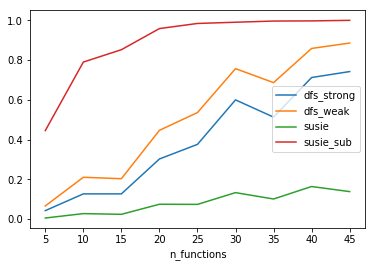

In [12]:
means.plot(kind="line")

In [13]:
means.index

Int64Index([5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='n_functions')

In [14]:
data = []
data.append(Scatter(x=means.index, y=100*np.array(means["dfs_strong"]), name="Ours Strong",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4))) # dash options include 'dash', 'dot', and 'dashdot'))
data.append(Scatter(x=means.index, y=100*np.array(means["dfs_weak"]), name="Ours Weak",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4, dash = "dashdot"))) # dash options include 'dash', 'dot', and 'dashdot
data.append(Scatter(x=means.index, y=100*np.array(means["susie"]), name="Smusie",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dot')))
# data.append(Scatter(x=means.index, y=100*np.array(means["susie_sub"]), name="With Subfunctions",
#                   line = dict(
#        color = ('rgb(0, 0, 0)'),
#        width = 4)))

In [15]:
layout = Layout(
  #  title='Comparisation Performance With Rule Order Optimization',
    font=dict(family='Latin Modern Math', size=6*3),
    xaxis=dict(
        title='Number of Functions',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Percentage of Answered Queries',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    legend=dict(x=0, y=1)
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [16]:
df_n_relations = df[df["n_functions"] == 30]

In [17]:
df_grouped = df_n_relations[["dfs_strong", "dfs_weak", "susie", "susie_sub", "n_relations"]].groupby(by="n_relations")

In [18]:
means = df_grouped.agg("mean")

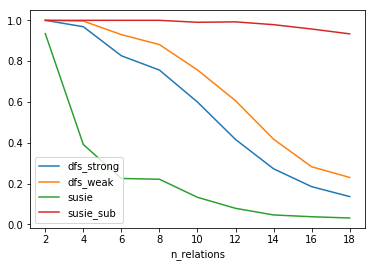

In [19]:
means.plot(kind="line")

In [20]:
data = []
data.append(Scatter(x=means.index, y=100*np.array(means["dfs_strong"]), name="Ours Strong",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4))) # dash options include 'dash', 'dot', and 'dashdot'))
data.append(Scatter(x=means.index, y=100*np.array(means["dfs_weak"]), name="Ours Weak",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = "dashdot"))) # dash options include 'dash', 'dot', and 'dashdot'))
data.append(Scatter(x=means.index, y=100*np.array(means["susie"]), name="Smusie",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dot')))
#data.append(Scatter(x=means.index, y=100*np.array(means["susie_sub"]), name="With Subfunctions",
#                   line = dict(
#        color = ('rgb(0, 0, 0)'),
#        width = 4)))

In [21]:
layout = Layout(
  #  title='Comparisation Performance With Rule Order Optimization',
    font=dict(family='Latin Modern Math', size=6*3),
    xaxis=dict(
        title='Number of Relations',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Percentage of Answered Queries',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    legend=dict(x=0.6, y=1)
)
fig = Figure(data=data, layout=layout)
iplot(fig)

RUNTIME

In [46]:
df_grouped = df_n_functions[["dfs_weak_time", "dfs_strong_time",
                                                                 "t_susie",
                             "n_functions"]].groupby(by="n_functions")

In [47]:
df_grouped = df_n_functions[["dfs_weak_time", "dfs_strong_time",
                                                                 "t_susie",
                             "n_functions"]].groupby(by="n_functions")

In [48]:
means = df_grouped.agg("mean")

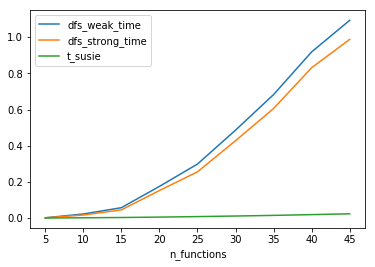

In [49]:
means.plot(kind="line")

In [50]:
means.index

Int64Index([5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='n_functions')

In [51]:
data = []
data.append(Scatter(x=means.index, y=np.array(means["dfs_strong_time"]), name="Ours Strong Time",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4))) # dash options include 'dash', 'dot', and 'dashdot'))
data.append(Scatter(x=means.index, y=np.array(means["dfs_weak_time"]), name="Ours Weak Time",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4, dash = "dashdot"))) # dash options include 'dash', 'dot', and 'dashdot
data.append(Scatter(x=means.index, y=np.array(means["t_susie"]), name="Smusie Time",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dot')))
# data.append(Scatter(x=means.index, y=100*np.array(means["susie_sub"]), name="With Subfunctions",
#                   line = dict(
#        color = ('rgb(0, 0, 0)'),
#        width = 4)))

In [52]:
layout = Layout(
  #  title='Comparisation Performance With Rule Order Optimization',
    font=dict(family='Latin Modern Math', size=6*3),
    xaxis=dict(
        title='Number of Functions',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Runtime in seconds',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    legend=dict(x=0, y=1)
)
fig = Figure(data=data, layout=layout)
iplot(fig)

In [35]:
df_n_relations = df[df["n_functions"] == 30]

In [36]:
df_grouped = df_n_relations[["dfs_weak_time", "dfs_strong_time",
                                                                 "t_susie", "n_relations"]].groupby(by="n_relations")

In [37]:
means = df_grouped.agg("mean")

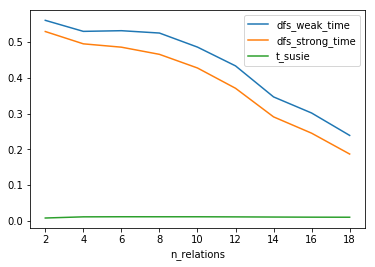

In [38]:
means.plot(kind="line")

In [43]:
data = []
data.append(Scatter(x=means.index, y=np.array(means["dfs_strong_time"]), name="Ours Strong Time",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4))) # dash options include 'dash', 'dot', and 'dashdot'))
data.append(Scatter(x=means.index, y=np.array(means["dfs_weak_time"]), name="Ours Weak Time",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = "dashdot"))) # dash options include 'dash', 'dot', and 'dashdot'))
data.append(Scatter(x=means.index, y=np.array(means["t_susie"]), name="Smusie Time",
                   line = dict(
        color = ('rgb(0, 0, 0)'),
        width = 4,
        dash = 'dot')))
#data.append(Scatter(x=means.index, y=100*np.array(means["susie_sub"]), name="With Subfunctions",
#                   line = dict(
#        color = ('rgb(0, 0, 0)'),
#        width = 4)))

In [44]:
layout = Layout(
  #  title='Comparisation Performance With Rule Order Optimization',
    font=dict(family='Latin Modern Math', size=6*3),
    xaxis=dict(
        title='Number of Relations',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Runtime in seconds',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    legend=dict(x=0.7, y=1)
)
fig = Figure(data=data, layout=layout)
iplot(fig)